In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#checking unique value
np.unique(df.TotalCharges.values)

array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype=object)

In [8]:
df=df.replace(to_replace=" ",value=np.nan)

In [9]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [10]:
df["TotalCharges"].isnull().sum()

11

In [11]:
#filling null values
df["TotalCharges"].fillna(df['TotalCharges'].mean(),inplace=True)

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
#dropping unecessary column
df.drop("customerID",axis=1,inplace=True)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

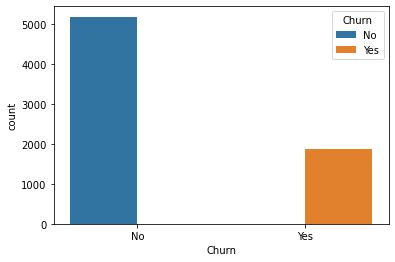

In [15]:
ax = sns.countplot(x='Churn', data=df, hue='Churn')

In [16]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [17]:
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Partner


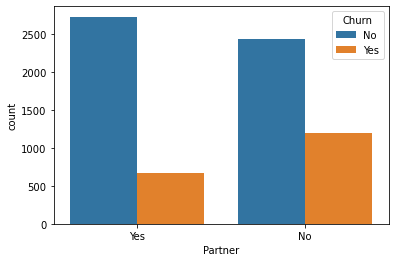

Dependents


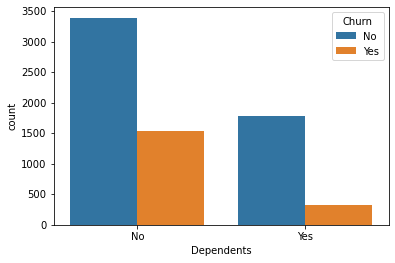

PhoneService


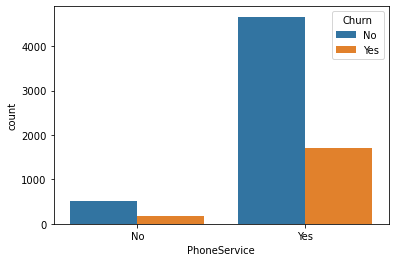

MultipleLines


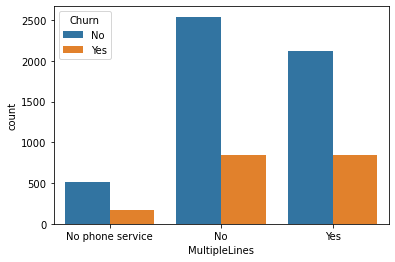

InternetService


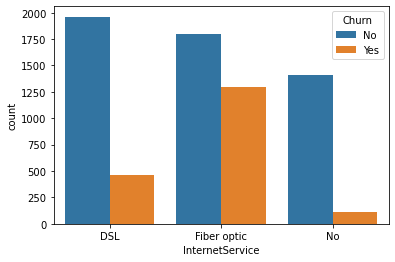

OnlineSecurity


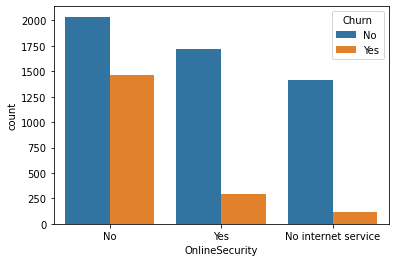

OnlineBackup


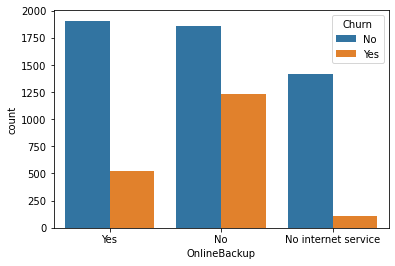

DeviceProtection


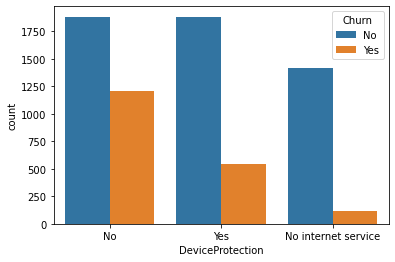

TechSupport


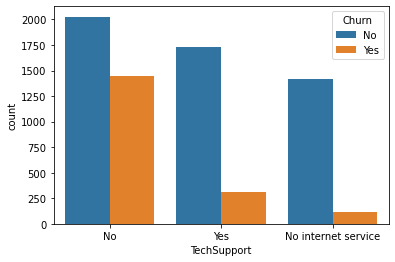

StreamingTV


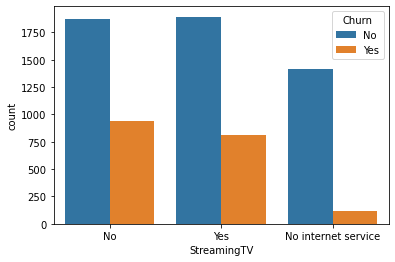

StreamingMovies


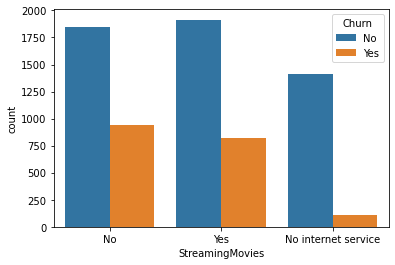

Contract


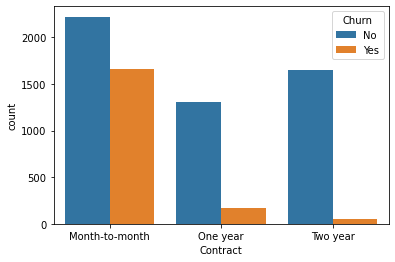

PaperlessBilling


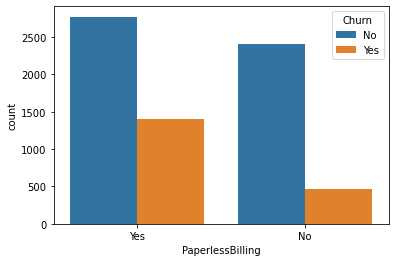

PaymentMethod


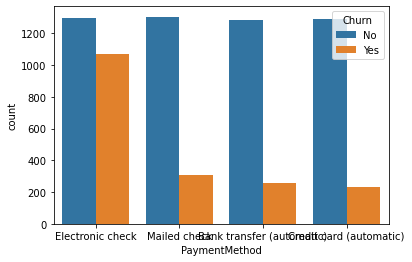

Churn


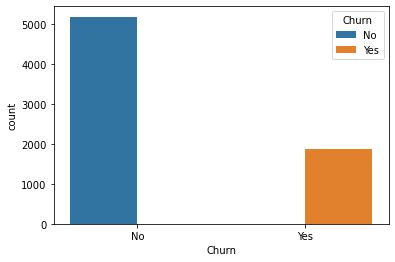

In [18]:

for i in categorical_features.columns[1:]:
    print(i)
    plt.figure()
    sns.countplot(df[i], hue='Churn', data=df)
    plt.show()

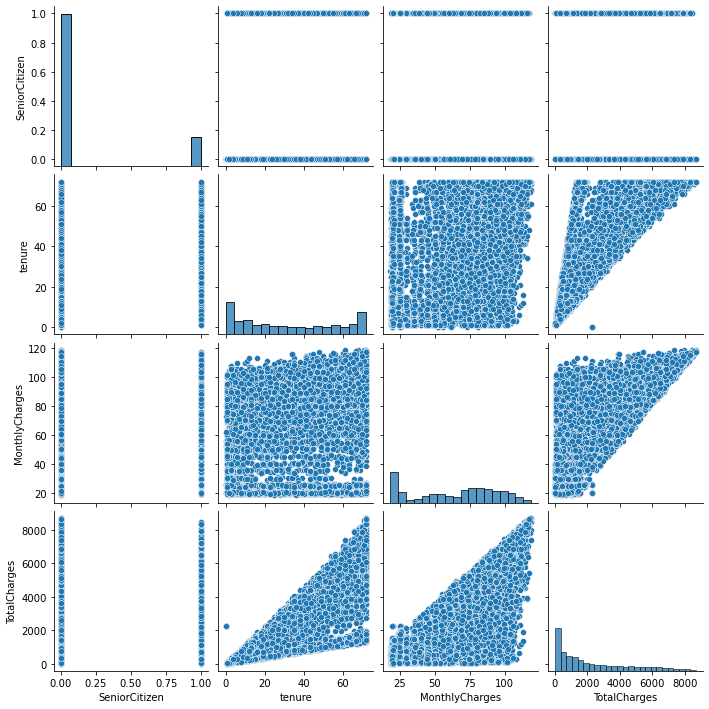

In [19]:
sns.pairplot(df)

In [20]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

SeniorCitizen


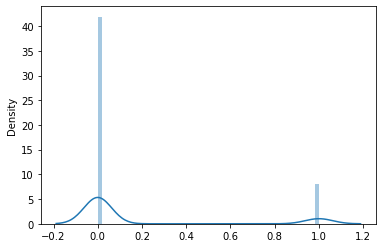

tenure


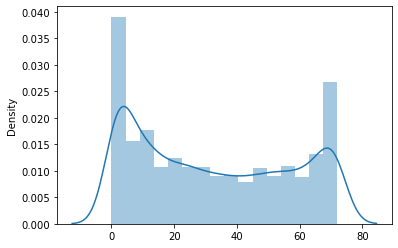

MonthlyCharges


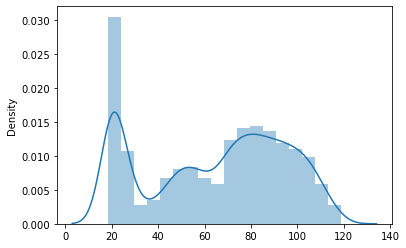

TotalCharges


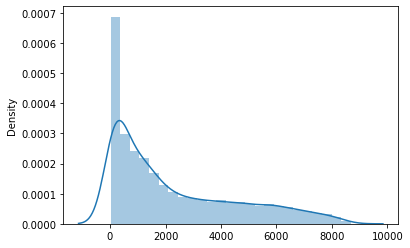

In [21]:
#checking distribution graph
for i in numeric_features.columns:
    print(i)
    plt.figure()
    sns.distplot(x=df[i])
    plt.show()

In [22]:
#converting categorical data into numeric ones
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [23]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

<AxesSubplot:>

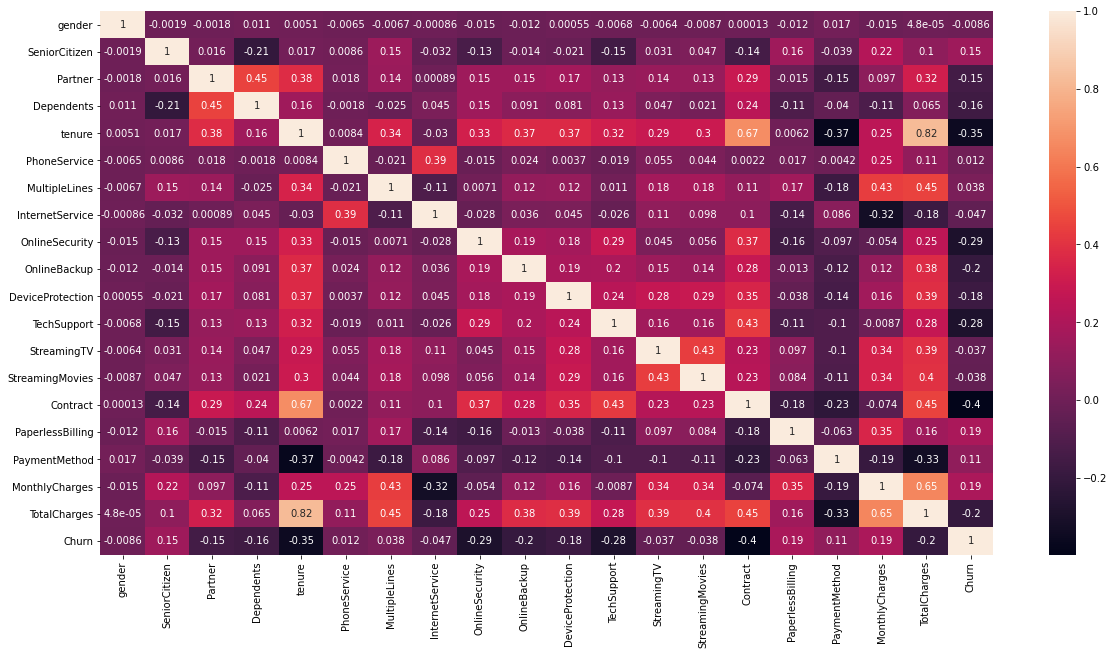

In [24]:
#checking correlaion
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(),annot=True)

In [25]:
df.corr()["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

we can see monthly charge is highly correlated and contract in negatively correlated

In [26]:
#checking skewness
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

gender                 AxesSubplot(0.125,0.749828;0.133621x0.130172)
SeniorCitizen       AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Partner              AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Dependents          AxesSubplot(0.606034,0.749828;0.133621x0.130172)
tenure              AxesSubplot(0.766379,0.749828;0.133621x0.130172)
PhoneService           AxesSubplot(0.125,0.593621;0.133621x0.130172)
MultipleLines       AxesSubplot(0.285345,0.593621;0.133621x0.130172)
InternetService      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
OnlineSecurity      AxesSubplot(0.606034,0.593621;0.133621x0.130172)
OnlineBackup        AxesSubplot(0.766379,0.593621;0.133621x0.130172)
DeviceProtection       AxesSubplot(0.125,0.437414;0.133621x0.130172)
TechSupport         AxesSubplot(0.285345,0.437414;0.133621x0.130172)
StreamingTV          AxesSubplot(0.44569,0.437414;0.133621x0.130172)
StreamingMovies     AxesSubplot(0.606034,0.437414;0.133621x0.130172)
Contract            AxesSubplot(0.

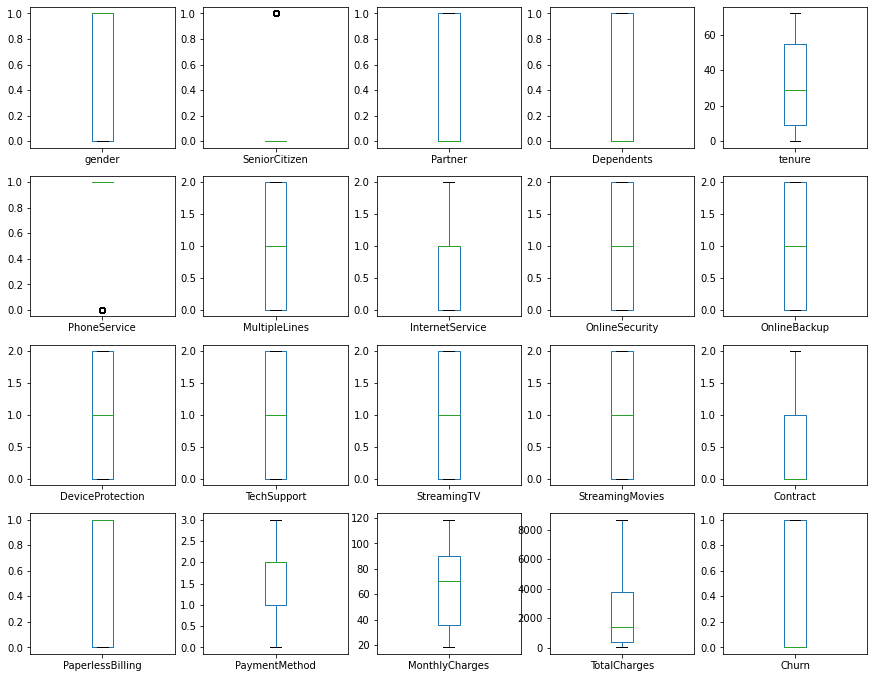

In [27]:
#checking outlier
df.plot(kind='box', figsize=(15,15), layout=(5,5), sharex=False, subplots=True)

we see that there is no outlier so we can proceed further

In [28]:
x=df.drop("Churn",axis=1)

y=df["Churn"]

In [29]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled, columns=x.columns)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.001938,gender
1,1.149759,SeniorCitizen
2,1.461052,Partner
3,1.382351,Dependents
4,7.213411,tenure
5,1.622493,PhoneService
6,1.394323,MultipleLines
7,1.826632,InternetService
8,1.268868,OnlineSecurity
9,1.218713,OnlineBackup


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

we will use many model to check accuracy

In [32]:
#logisticregression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve, roc_auc_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 80.62455642299503
[[923 112]
 [161 213]]
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1035
         1.0       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [33]:
#knneighbour classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  76.22427253371185
[[886 149]
 [186 188]]
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84      1035
         1.0       0.56      0.50      0.53       374

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.76      0.76      0.76      1409



In [34]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  73.88218594748048
[[842 193]
 [175 199]]
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      1035
         1.0       0.51      0.53      0.52       374

    accuracy                           0.74      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.74      0.74      1409



In [35]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  80.0567778566359
[[941  94]
 [187 187]]
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1035
         1.0       0.67      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [36]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  79.20511000709723
[[926 109]
 [184 190]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1035
         1.0       0.64      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [37]:
#checking cross validatio score
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Logistic Regression model :",scr.mean())

scr=cross_val_score(rfc, x, y, cv=5)
print("Cross validation score of Random Forest model :",scr.mean())

scr=cross_val_score(knn, x, y, cv=5)
print ("Cross validation score of knn model :",scr.mean())
      
scr=cross_val_score(gb, x, y, cv=5)
print ("Cross validation score of gb model :",scr.mean())

scr=cross_val_score(dt, x, y, cv=5)
print ("Cross validation score of dt model :",scr.mean())

Cross validation score of Logistic Regression model : 0.8023577125943608
Cross validation score of Random Forest model : 0.789011387831473
Cross validation score of knn model : 0.7537976240402606
Cross validation score of gb model : 0.804772082069811
Cross validation score of dt model : 0.7298022251435577


As GradientBoostingClassifier giving high accuracy so we will do hypertuning on this model

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=21)

In [39]:
gb=GradientBoostingClassifier()
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'learning_rate':np.arange(0.1,1,0.1)}

In [40]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(gb,param_grid,cv=5,n_jobs=-1)
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [41]:
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [42]:
y_pred=clf.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8012492901760363

In [43]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[1172,  123],
       [ 227,  239]], dtype=int64)

In [44]:
auc=roc_auc_score(y_test,y_pred)
auc

0.7089474207499958

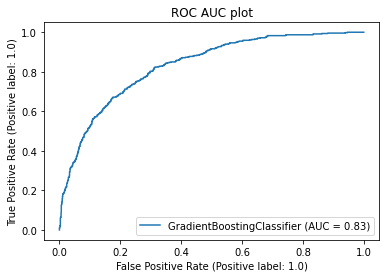

In [45]:
#checking roc,auc graph
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# conclusion

so after roc,auc curve our final accuracy is 83% and GradientBoostingClassifier is our best model

In [ ]:
# Fit the model on training set
import pickle
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)